Goal is to center the pieces and rescale based on the detected checkerboard coordinates.

In [155]:
%load_ext autoreload
%autoreload 2

import cv2
import numpy as np
import matplotlib.pyplot as plt
from cam_chess import capture, detect_checkerboard

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Calibration

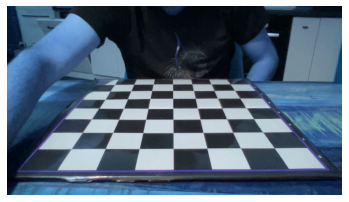

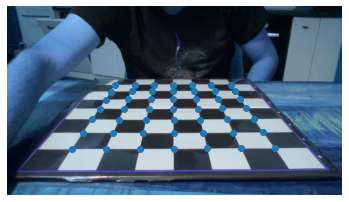

In [47]:
img = capture()
corners = detect_checkerboard(img)

In [59]:
np.save('img/empty_board', img)

# Example of filled board

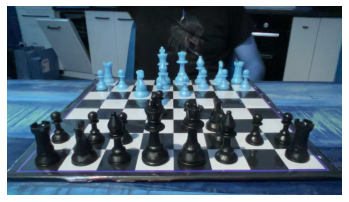

In [48]:
fig = capture()

In [60]:
np.save('img/filled_board', fig)

# Preprocessing

Since we have corners of each cell we can at least center and stretch each cell before passing input to NN. Simples idea would be to have classifier that tries to identify two things:

1. Is cell empty
2. What figure is in the cell

**Q:** is it enough to have a classifier 'is cell empty' to track the game? If so that will simplify the model.

**A:** yes, knowing the rules of the game 'is cell empty' classifier is sufficient.

Two flawors of 'is cell empty' classifier:

1. We feed in single centered cell and ask for y/n output
2. We feed in full board and ask for 8x8 grid filled with y/n

Clearly the first choice should be simpler to implement. It might be that our classifier will learn to look for the chess piece base and thus might ignore partial occlusions.

# Reshaping

Instead of manually candling corners we will use perspective transform. 

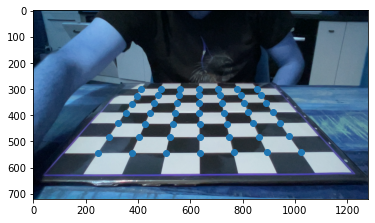

In [237]:
plt.imshow(img)
plt.scatter([c[0][0] for c in corners],
            [c[0][1] for c in corners])

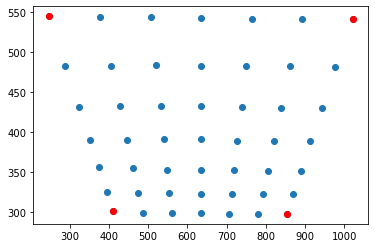

In [238]:
vertices = np.stack([corners[0][0], corners[6][0], corners[-1][0], corners[42][-1]]).astype('float32')

plt.scatter([c[0][0] for c in corners],
            [c[0][1] for c in corners])

plt.scatter([c[0] for c in vertices],
            [c[1] for c in vertices], color='red')

# Also adjust to player perspective
target = np.array([[100, 700], [700, 700],
                   [700, 100], [100, 100]]).astype('float32')

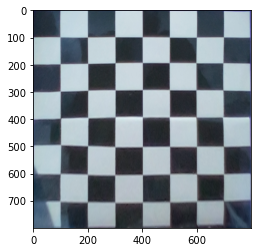

In [239]:
matrix = cv2.getPerspectiveTransform(vertices, target)
result = cv2.warpPerspective(img, matrix, (800, 800))

plt.imshow(result)

Now let's see how our figures will look like after such transform.

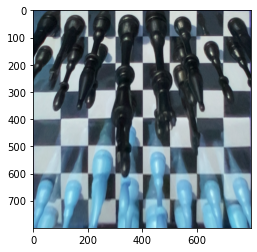

In [240]:
result = cv2.warpPerspective(fig, matrix, (800, 800))

plt.imshow(result)

Result is qoute decent and can be easily chopped up to managable size images (100x100).

(-0.5, 99.5, 99.5, -0.5)

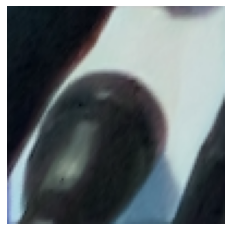

In [241]:
plt.imshow(result[100:200, :100])
plt.axis('off')

Images are not sharp, but should be enough to detect piece presence.

# Open problems

- It is still unknown how to make system adjustments given new piece set, but let's wonder about that in the future.
- How to do efficient labeling? For the labeling part we can simply replay some well known games and capture frames one by one.
- What about different lighting conditions and laptop/phone cams? 
- Is it deployed as the web page or app?